In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import h5py
import numpy as np
import statistics 

In [3]:
def get_reads_dict(filename):
    file = h5py.File(filename, "r")
    file = file['Reads']
    reads = []
    for r in file.keys():
        elem = {}
        elem['UUID'] = r
        for k in file[r].keys():
            elem[k]=file[r][k][()]
        reads.append(elem)
    return reads

def normalise_list(lst):
    mmin = min(lst)
    mmax = max(lst)
    lst = (lst - mmin)/(mmax - mmin)
    return lst

In [17]:
reads = get_reads_dict("./../../taiyakiOutputs/output_createfasta.hdf5")
mapped_reads = get_reads_dict("./../../taiyakiOutputs/output_justfromfasta.hdf5")

In [42]:
memory_size = 10
memory = [None] * 10

def get_memory_mean(list):
    lst = []
    for m in memory:
        if(m == None):
            continue
        lst.append(m)
    return statistics.mean(lst)

def get_mm_memory_mean(lst):
    lst_min = []
    lst_max = []
    for m in lst:
        if(m == None):
            continue
        lst_min.append(lst[m][0])
        lst.max.append(lst[m][1])
    return [lst_min, lst_max]
 
def get_cut_position(signal, window_size, mean_cap, pdf_cap):
    f = 0
    t = f + window_size
    cut_index = 0
    
    while(t < 2000):
        mean = statistics.mean(signal[f:t])
        std = statistics.stdev(signal[f:t])
        pdf = 1/(std * np.sqrt(2 * np.pi))
        
        #print("{}-{}".format(f,t))
        #print("Mean: {}".format(mean))
        #print("Standard deviation: {}".format(std))
        #print("Probability density function: {}".format(pdf))
        #print("----------")
        
        memory_index = int(f % (window_size * memory_size) / window_size)
        memory[memory_index] = mean 
        memory_mean = get_memory_mean(memory)
        
        if(pdf > pdf_cap and abs(memory_mean - mean) < mean_cap):
            cut_index = t
            
        t = t + window_size
        f = f + window_size
    return cut_index

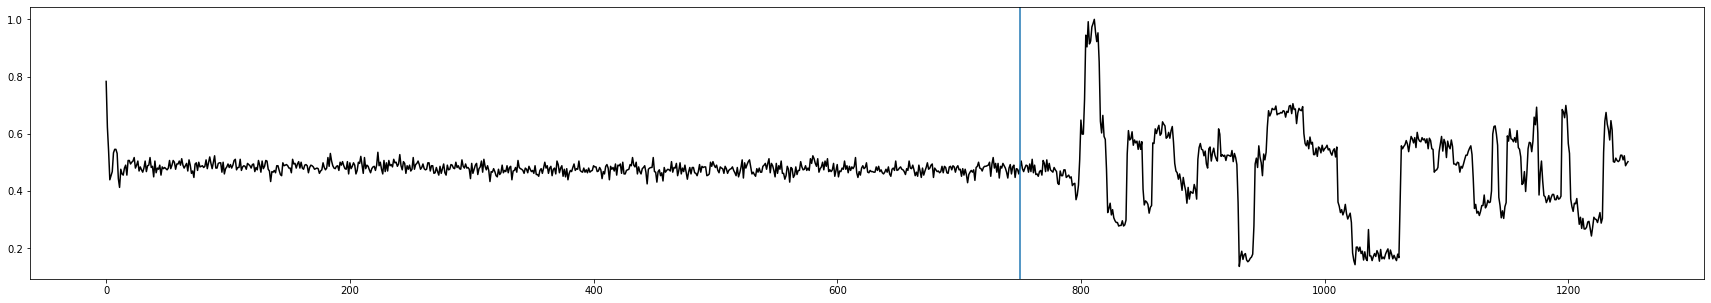

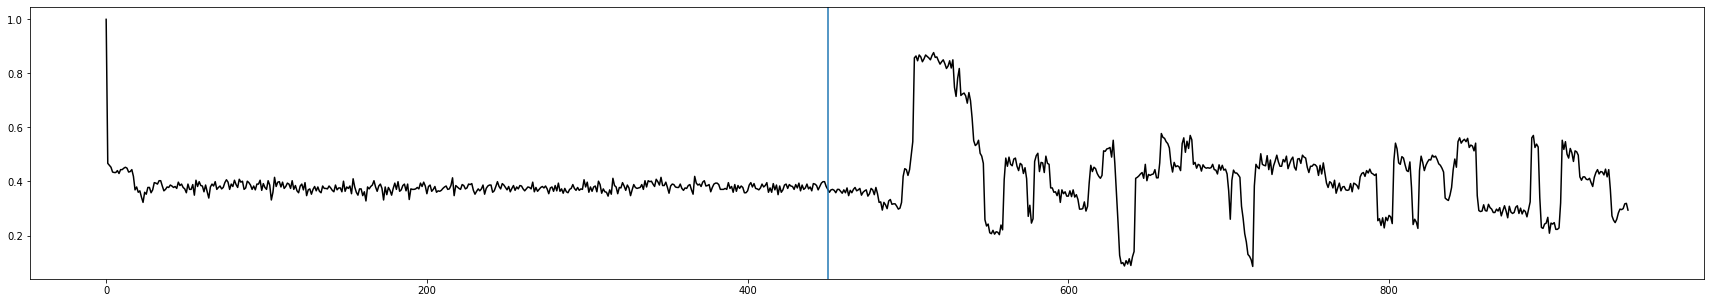

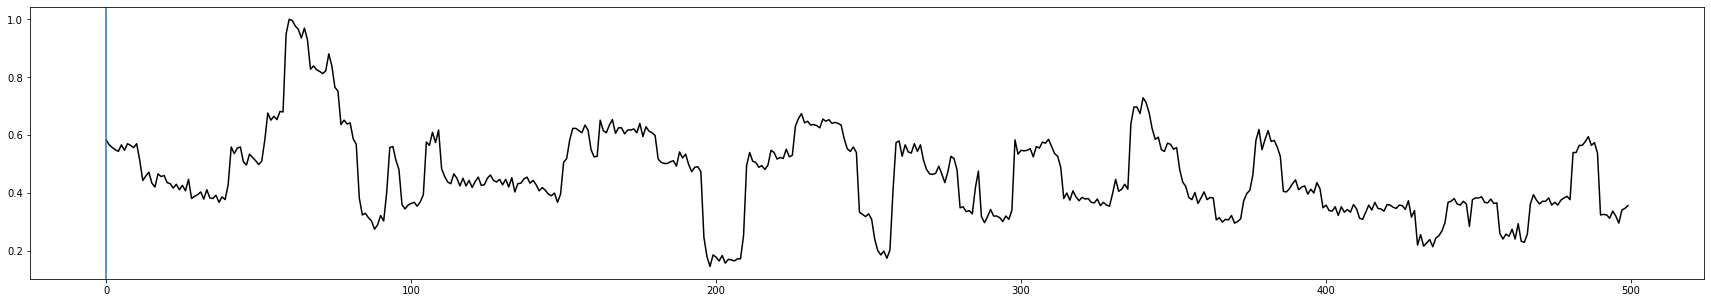

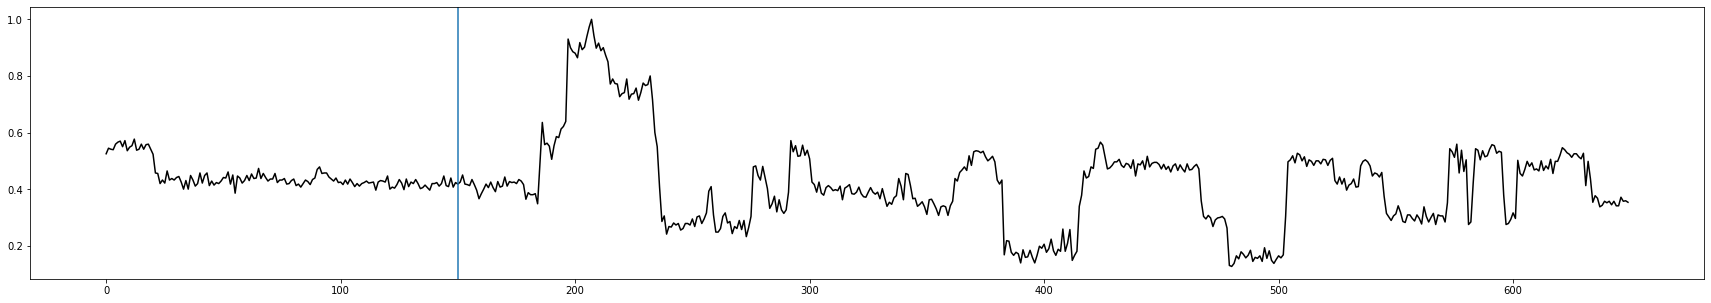

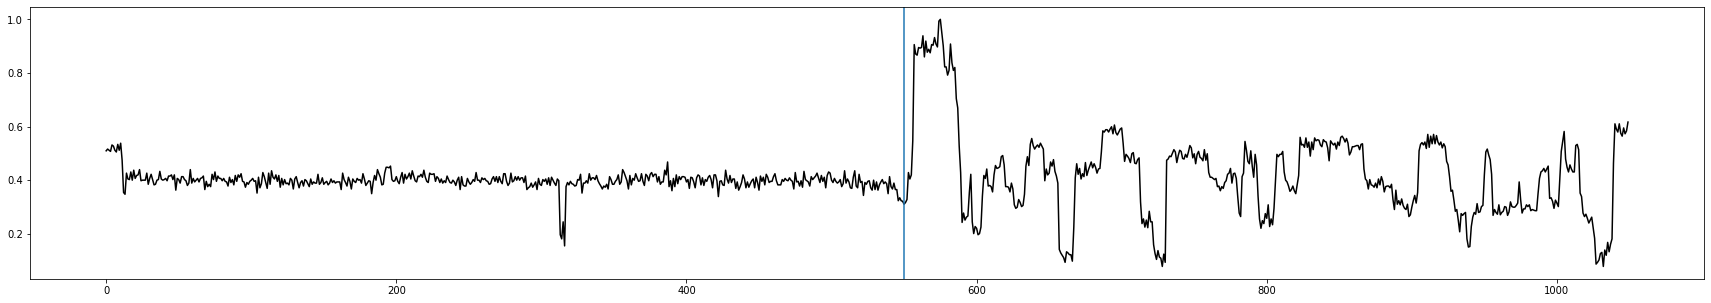

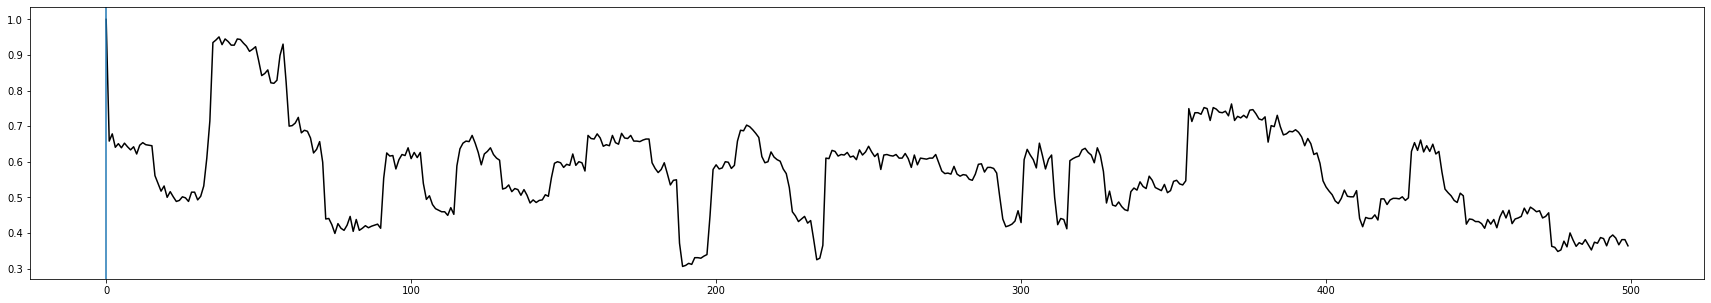

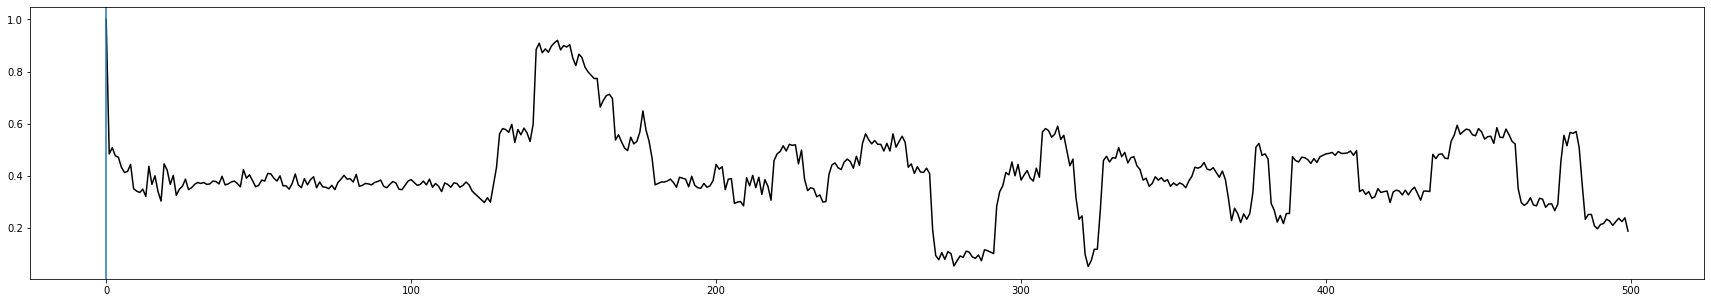

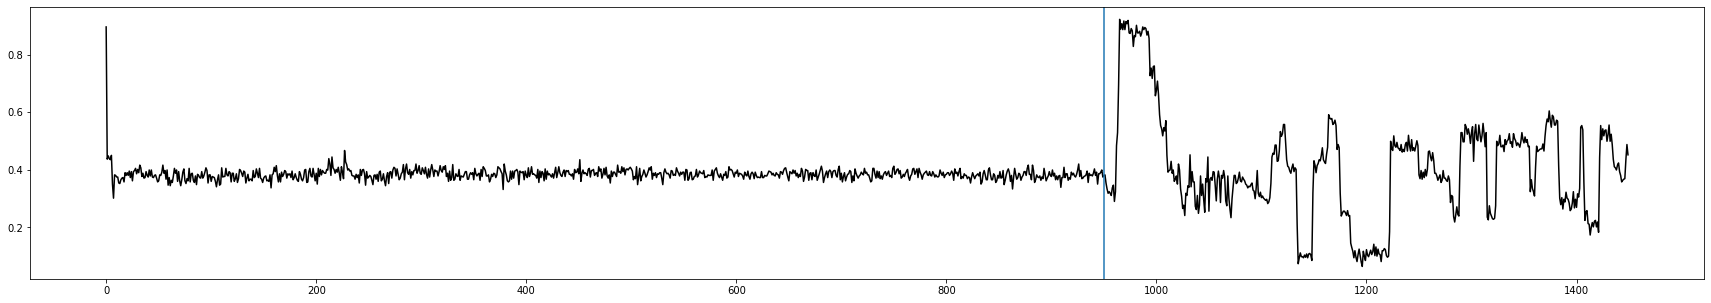

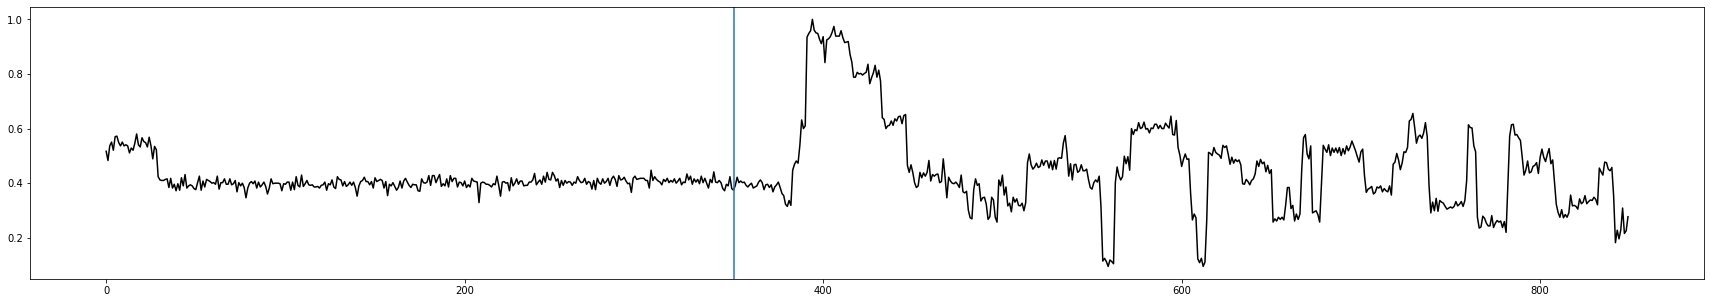

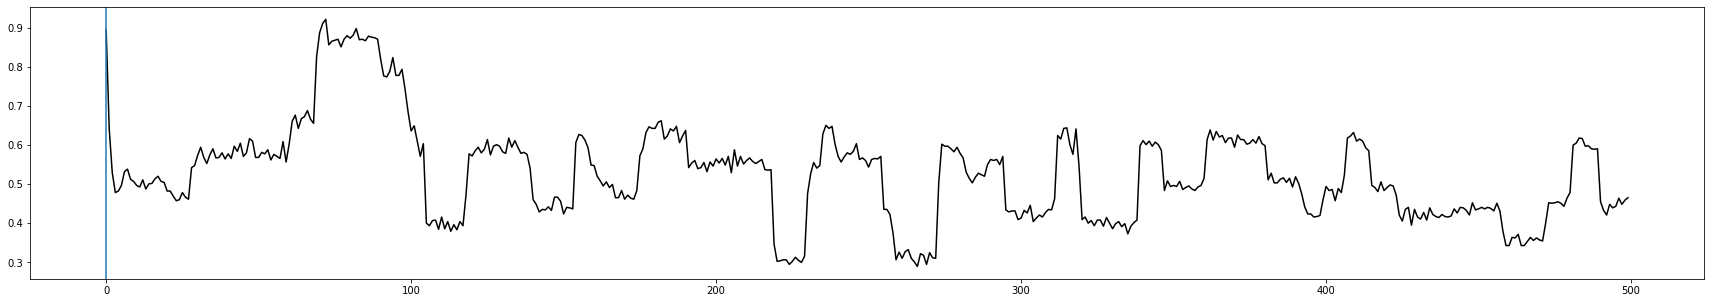

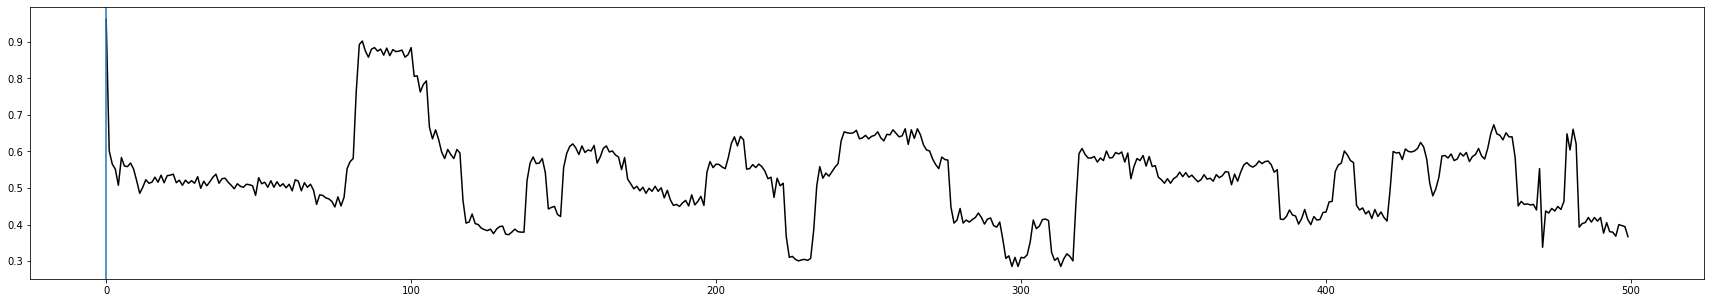

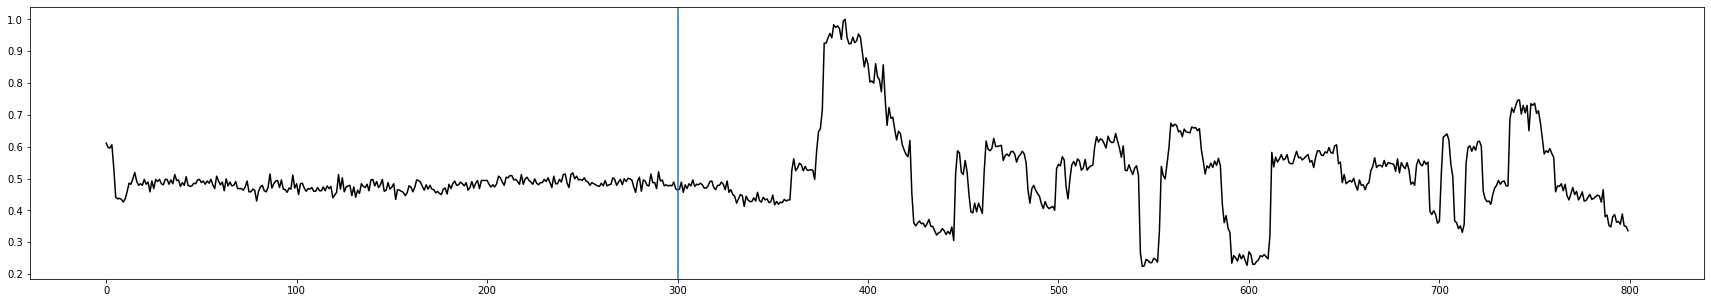

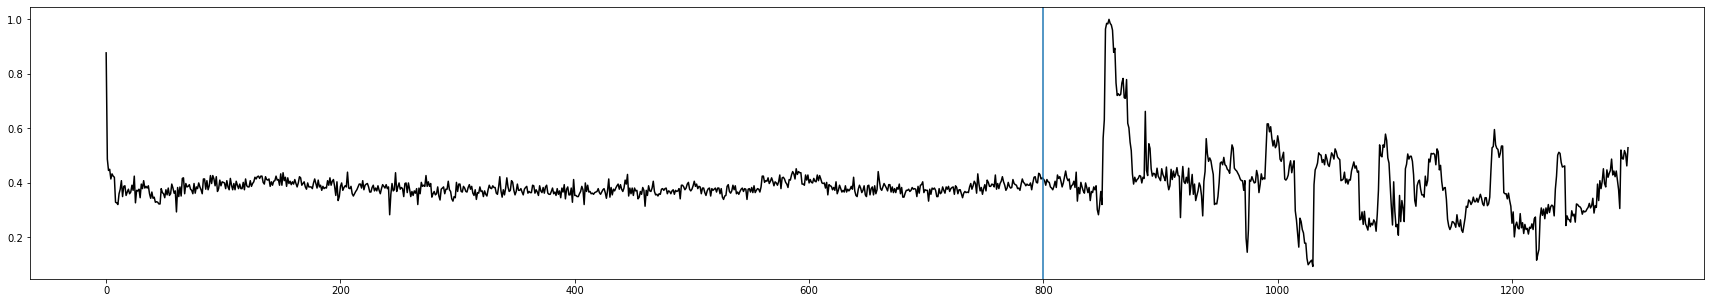

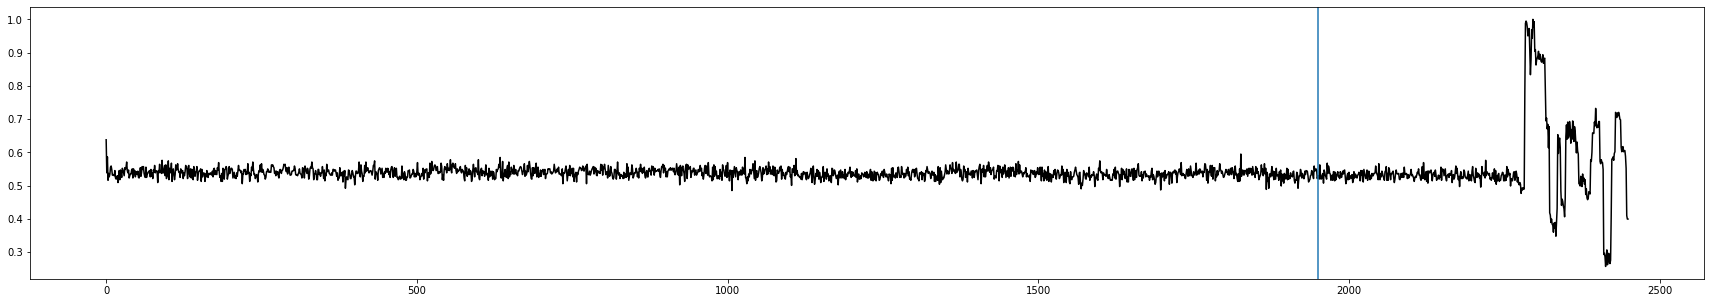

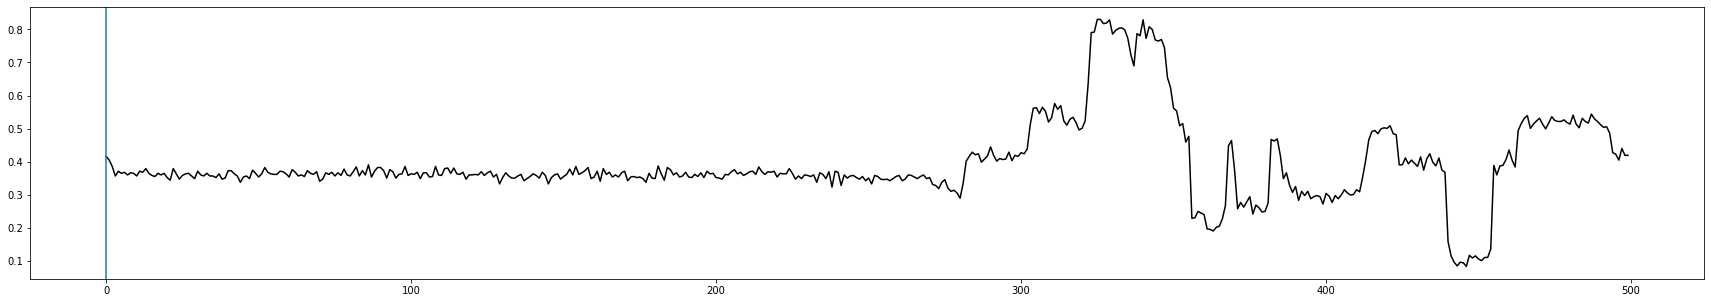

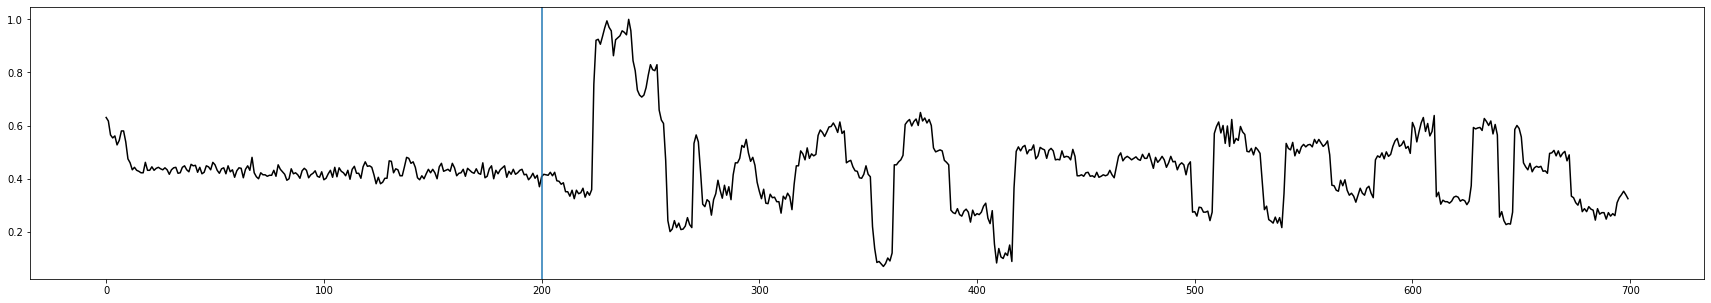

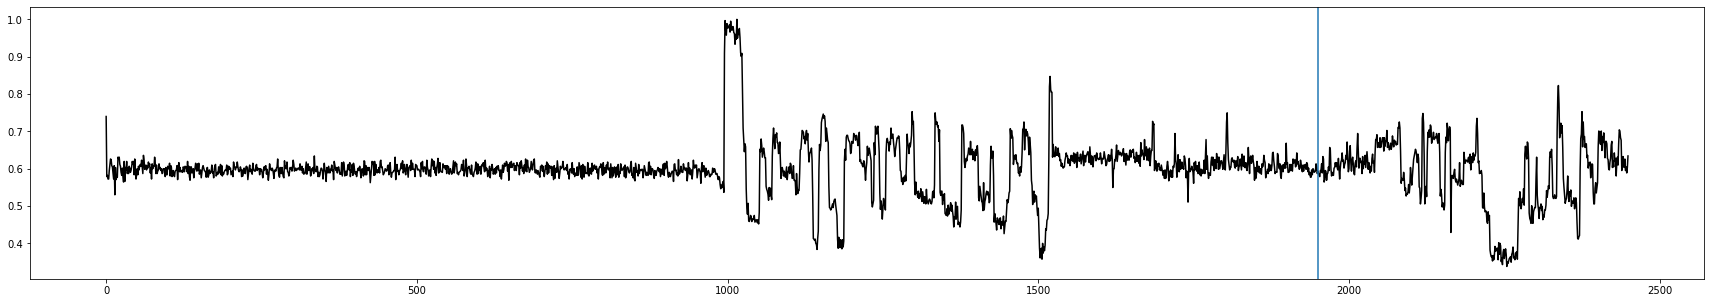

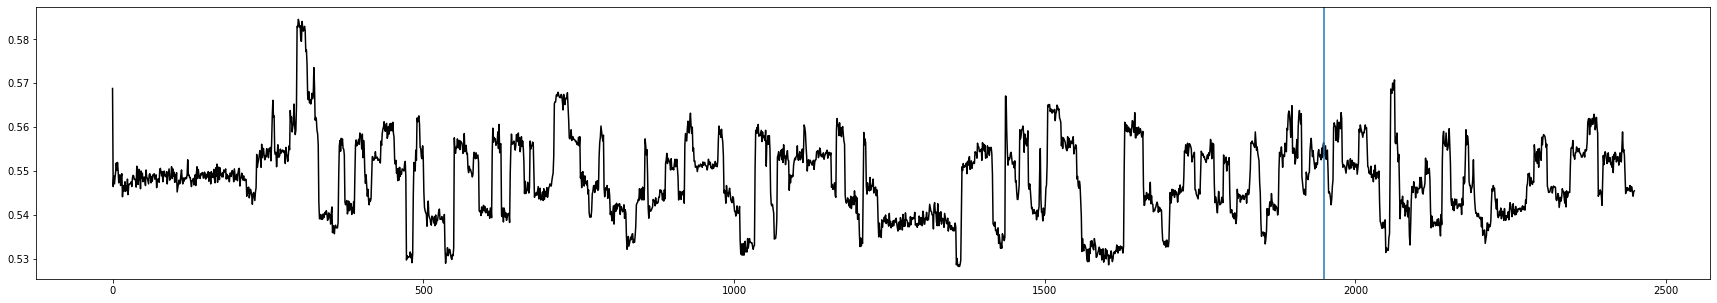

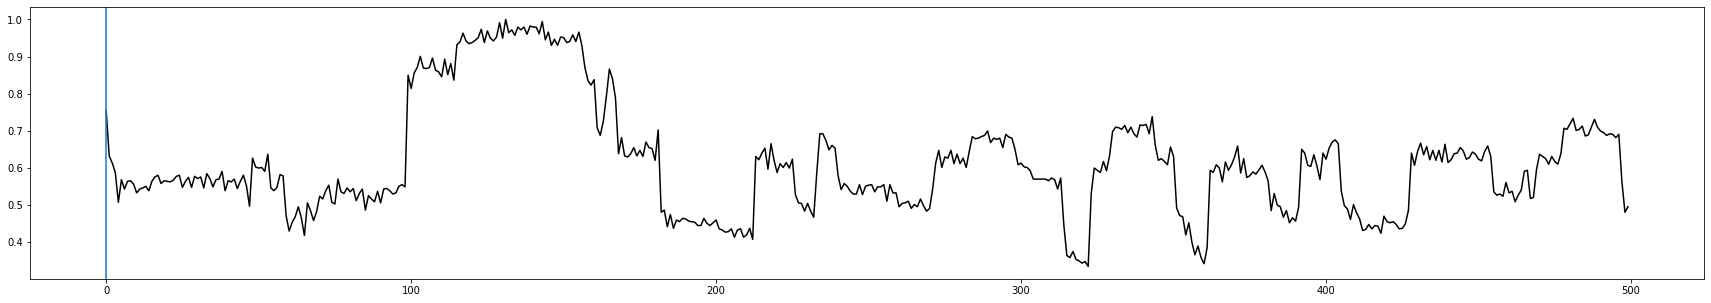

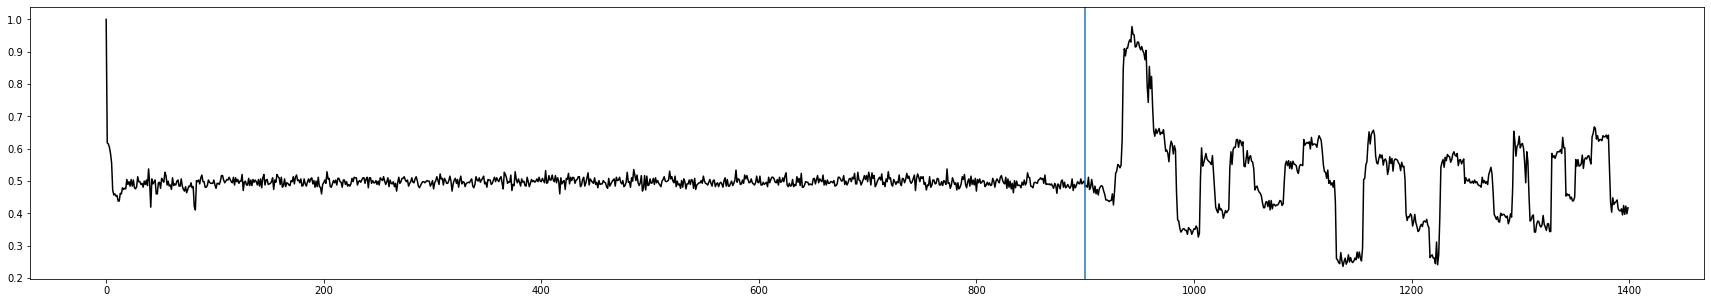

In [45]:
#good_examples = [1,2,3,5,6,7,8,9,10,11,12,12,14,19]


for i in range(20):
    read = reads[i]
    signal = normalise_list(read['Dacs'])
    index = get_cut_position(signal, 50, 0.03, 15)

    plt.figure(figsize=(30,5))
    plt.plot(signal[:index+500], 'k', label="cut")
    plt.axvline(x=index)
    plt.show()